In [17]:
# Text Processing / NLP on a Buiness Case

In [ ]:
# Today Agenda :  EDA + Processing + Model Building + Business Case Study

In [ ]:
# Step
# 1. Import of Basic Libraries
# 2. Import of the source (csv/text/etc) files containing reviews/data/text
# 3. Take a look of the data and try to think thru which can be the predictor variables
# 4. Decide which model it can be fit to - Regression or Classification and why
# 5. Lets say we selected "Polarity" - we can then bucket the data into 3 portions based on the ranges of "Polarity" - Positive,
#    Neutral and Negative
# 6. May be we can create another column to store and then wordcloud the un-used words


NLP: Choose the Right Library


1. Stanford CoreNLP

	pip install stanford-corenlp

	CoreNLP use cases:-
		Grammar and syntax checking
		Entity extraction
		Sentiment analysis

	Learn more: https://stanfordnlp.github.io/CoreNLP/
			  https://pypi.org/project/stanford-corenlp/ 


2. NLTK
	
	pip install nltk

	NLTK use cases:-
		Quick prototyping for POCs
		Can be used for Removing stop words and persons names in your recommendation systems
		Sentiment Analysis to check if product review is positive or negative.

	Learn more: https://www.nltk.org/


3. Gensim

	pip install — upgrade gensim

	Gensim use cases:-
		Converting words and document to vectors
		Finding text similarity
		Text summarization

Learn more: https://radimrehurek.com/gensim/


4. SpaCy

	pip install –U setuptools wheel
	pip install –U spacy
	python -m spacy download en_core_web_sm

	Spacy gives a one-stop-shop for tasks commonly used across any NLP based products, including:
		Tokenization
		Lemmatisation
		Part-of-speech tagging
		Entity recognition
		Dependency parsing
		Sentence recognition
		Word-to-vector transformations
		Many convenience methods for cleaning and normalising text

	Spacy use cases:-
		Part of speech tagging
		Rule-Based Matching- This a new addition in spacy, you can find phrases or words in text using user defined rules.
		Best for production grade projects

	Learn more: https://spacy.io/


5. Polyglot

	pip install polyglot

	Polyglot use cases:-
		Language detection, 196 languages are supported
		Sentiment Analysis: Can be a really cool feature to have in a chatbot.

	Learn more: http://polyglot.readthedocs.org/


6. scikit–learn

	pip install scikit-learn

	Scikit-learn use cases:-
		Document and text classification related NLP problem.

	Learn more: https://scikit-learn.org/stable/


7. TextBlob

	pip install -U textblob
	python -m textblob.download_corpora

	TextBlob offers a neat API for performing common NLP tasks like part-of-speech tagging, noun phrase extraction, sentiment analysis, 	classification, language translation, word inflection, parsing, n-grams, and WordNet integration.

	Learn more: https://textblob.readthedocs.io/en/dev/


8. Pattern
	
	pip install pattern

	Pattern is a text processing, web mining, natural language processing, machine learning, and network analysis tool for Python. It 	comes with a host of tools for data mining (Google, Twitter, Wikipedia API, a web crawler, and an HTML DOM parser), NLP (part-of-	speech taggers, n-gram search, sentiment analysis, WordNet), ML (vector space model, clustering, SVM), and network analysis by graph 	centrality and visualization. 

	Learn more: https://github.com/clips/pattern


9. PyNLPl

	pip install pynlpl

	PyNLPl is segregated into different modules and packages, each useful for both standard and advanced NLP tasks. While you can use 	PyNLPl for basic NLP tasks like extraction of n-grams and frequency lists, and to build a simple language model, it also has more 	complex data types and algorithms for advanced NLP tasks. 

	Learn more: https://pynlpl.readthedocs.io/en/latest/


10. AllenNLP

	pip install allennlp

	AllenNLP utilizes SpaCy open-source library for data preprocessing while at the same time dealing with the lay cycles all alone. The 	fundamental component of AllenNLP is that it is easy to utilize. 

	Learn more: https://allenai.org/allennlp
			  https://pypi.org/project/allennlp/

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [14]:
# importing basic libraries & setting directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

# these are for regular expressions

import re
import string
# for text processing or creating stopwords
from nltk.corpus import stopwords


from wordcloud import WordCloud
from wordcloud import STOPWORDS, ImageColorGenerator

# import emoji
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# for tokenization & vectorization
from sklearn.feature_extraction import text

# for TFID Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk import word_tokenize,pos_tag
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from plotly import tools
init_notebook_mode(connected=True)
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer as TV
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report,cohen_kappa_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagh0521\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
# Importing the data/file to Python

women_review = pd.read_csv("NLP_Text_Processing_Womens_Clothing_E-Commerce_Reviews.csv")
process_review = pd.read_csv("NLP_Text_Processing_Review_with_sentiment.csv")

In [73]:
women_review.shape

(23486, 11)

In [74]:
process_review.shape

(22641, 11)

In [75]:
women_review.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [76]:
process_review.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Polarity                   0
review_len                 0
token_count                0
dtype: int64

In [77]:
women_review.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [78]:
process_review.dtypes

Age                          int64
Review Text                 object
Rating                       int64
Recommended IND              int64
Positive Feedback Count      int64
Division Name               object
Department Name             object
Class Name                  object
Polarity                   float64
review_len                   int64
token_count                  int64
dtype: object

In [79]:
women_review.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [80]:
process_review.head(10)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,review_len,token_count
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,53,8
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,303,67
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,500,98
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,124,22
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36
5,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,488,98
6,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,496,101
7,39,"I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,0.171635,482,97
8,24,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,0.002500,166,34
9,34,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,0.204200,360,72


In [81]:
# Say we have identified that "Polarity" would be the predicted variable - so checking the unique values in it

print(process_review['Polarity'].unique())
print(process_review['Polarity'].nunique())

[0.63333333 0.33958333 0.07367495 ... 0.21113553 0.55266667 0.41388889]
12890


In [82]:
# Checking the list of columns in the dataset

process_review.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Polarity', 'review_len', 'token_count'],
      dtype='object')

In [83]:
# segregating data into 3 buckets based on Polarity

# process_review['Polarity_Bucket']=''

# if process_review['Polarity'] < 0 :
 #   process_review['Polarity_Bucket']='Negative'
#elif ( process_review['Polarity'] > 0 and  process_review['Polarity'] < 1 ) :
#    process_review['Polarity_Bucket']='Neutral'
#elif process_review['Polarity'] > 0:
#    process_review['Polarity_Bucket']='Positive'
# else : process_review['Polarity_Bucket']='Positive'


In [84]:
# 1 way to cut / split the data  - based on the bin - bucketing to 3 bins as below

review_cat = pd.cut(x=process_review['Polarity'], bins=[-1,-0.3,0.6,1], labels=['negative','neutral','positive']  )

In [85]:
review_cat.head()

0    positive
1     neutral
2     neutral
3     neutral
4     neutral
Name: Polarity, dtype: category
Categories (3, object): ['negative' < 'neutral' < 'positive']

In [86]:
review_cat,process_review['Polarity']

(0        positive
 1         neutral
 2         neutral
 3         neutral
 4         neutral
            ...   
 22636     neutral
 22637     neutral
 22638     neutral
 22639     neutral
 22640     neutral
 Name: Polarity, Length: 22641, dtype: category
 Categories (3, object): ['negative' < 'neutral' < 'positive'],
 0        0.633333
 1        0.339583
 2        0.073675
 3        0.550000
 4        0.512891
            ...   
 22636    0.552667
 22637    0.091667
 22638    0.414286
 22639    0.322222
 22640    0.413889
 Name: Polarity, Length: 22641, dtype: float64)

In [87]:
review_cat.value_counts()

neutral     21838
positive      743
negative       60
Name: Polarity, dtype: int64

In [88]:
# Bucketing the data into 3 buckets and applying on the dataset

process_review['Polarity_Bucket']=pd.cut(x=process_review['Polarity'], bins=[-1,-0.3,0.6,1], labels=['negative','neutral','positive']  )

In [89]:
process_review['Polarity_Bucket'].head()

0    positive
1     neutral
2     neutral
3     neutral
4     neutral
Name: Polarity_Bucket, dtype: category
Categories (3, object): ['negative' < 'neutral' < 'positive']

In [90]:
# after applying the bucketization - on the dataset - checking the counts 

process_review['Polarity_Bucket'].value_counts()

neutral     21838
positive      743
negative       60
Name: Polarity_Bucket, dtype: int64

In [91]:
# dropping the new added column - to try another method of bucketization

process_review.drop(['Polarity_Bucket'], axis=1)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,review_len,token_count
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,53,8
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,303,67
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,500,98
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,124,22
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36
...,...,...,...,...,...,...,...,...,...,...,...
22636,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,131,28
22637,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,223,37
22638,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,208,42
22639,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,427,86


In [92]:
#  Function way to bucket/split the data  - using normal if else Function

def bucketing(Polarity):
    if Polarity < 0 :
        return 'Negative'
    elif Polarity > -0.30 and Polarity < 0.30 :
        return 'Neutral'
    else :
        return 'Positive'



In [93]:
# applying the function on the dataset with the new bucketization rules

process_review['Polarity_Bucket'] = process_review['Polarity'].apply(bucketing)

In [94]:
process_review['Polarity_Bucket'].head()

0    Positive
1    Positive
2     Neutral
3    Positive
4    Positive
Name: Polarity_Bucket, dtype: object

In [95]:
# after applying the bucketization - on the dataset - checking the counts 

process_review['Polarity_Bucket'].value_counts()

Neutral     13296
Positive     8023
Negative     1322
Name: Polarity_Bucket, dtype: int64

<AxesSubplot:xlabel='Polarity_Bucket', ylabel='count'>

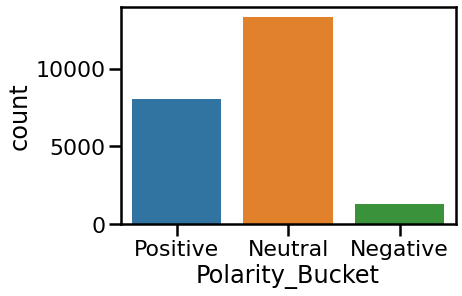

In [96]:
# Plotting an Univariate Graph or simple graph to check how the current state of the new variable looks like

sns.set_context('poster')           # this is make the graph look good
sns.countplot( x = 'Polarity_Bucket', data = process_review )

In [97]:
# finding a % of each record group by the particular column 

round(process_review.groupby('Polarity_Bucket')['Polarity_Bucket'].count()/process_review.shape[0] * 100 , 2 )

Polarity_Bucket
Negative     5.84
Neutral     58.73
Positive    35.44
Name: Polarity_Bucket, dtype: float64

In [98]:
# finding a count of column group by another column 

process_review.groupby('Age')['Polarity_Bucket'].count()

Age
18      4
19     40
20    105
21     98
22    140
     ... 
91      4
92      1
93      2
94      3
99      2
Name: Polarity_Bucket, Length: 77, dtype: int64

In [99]:
# Checking all the column names of the current dataset

process_review.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Polarity', 'review_len', 'token_count',
       'Polarity_Bucket'],
      dtype='object')

In [100]:
# Renaming the column names to avoid spaces in them 

process_review.rename(columns = {'Review Text':'review', 'Recommended IND':'recommended_IND', 'Positive Feedback Count':'pos_fdbk_count',
                     'Division Name':'div_name', 'Class Name':'class_name', 'Department Name':'dept_name'}, inplace = True)

In [101]:
# Checking head of each category of data that got split 

print('==============  printing the Positive Reviews ============')
print(process_review[ process_review . Polarity_Bucket == 'Positive'].head(2))
print('==============  printing the Neutral Reviews ============')
print(process_review[ process_review . Polarity_Bucket == 'Neutral'].head(2))
print('==============  printing the Negative Reviews ============')
print(process_review[ process_review . Polarity_Bucket == 'Negative'].head(2))

==============  printing the Positive Reviews ============
   Age                                             review  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   

   recommended_IND  pos_fdbk_count   div_name dept_name class_name  Polarity  \
0                1               0  Initmates  Intimate  Intimates  0.633333   
1                1               4    General   Dresses    Dresses  0.339583   

   review_len  token_count Polarity_Bucket  
0          53            8        Positive  
1         303           67        Positive  
==============  printing the Neutral Reviews ============
   Age                                             review  Rating  \
2   60  I had such high hopes for this dress and reall...       3   
5   49  I love tracy reese dresses, but this one is no...       2   

   recommended_IND  pos_fdbk_count div_name dept_name class_name  Polarity  \
2            

In [102]:
# simple function to clean/process texts, remove punctuation marks, convert to same case, etc

def text_processing(x):
    x = x.lower()
    #x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ', x)    # remove all single characters
    x = re.sub(r'\^[a-zA-Z]\s+', ' ', x)    # Remove single characters from the start
    x= re.sub(r'\s+', ' ', x, flags=re.I)   # Substituting multiple spaces with single space
    x = re.sub(r'^b\s+', '', x)             # Removing prefixed 'b'
    x = re.sub(r'@\S+', ' ', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    #x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', "", x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub('http://\S+|https://\S+', '', x)
    return x

In [103]:
# applying the text cleaning function on the dataset - 'review column'

process_review['clean_review'] = process_review.review.apply(text_processing)

In [104]:
# applying the text cleaning function on the dataset - 'review column'  - another way

process_review['clean_review_2'] = process_review['review'].apply(text_processing)

In [105]:
# checking after cleaning

process_review['clean_review']

0        absolutely wonderful silky and sexy and comfor...
1        love this dress it sooo pretty happened to fin...
2        i had such high hopes for this dress and reall...
3        i love love love this jumpsuit it fun flirty a...
4        this shirt is very flattering to all due to th...
                               ...                        
22636    i was very happy to snag this dress at such gr...
22637    it reminds me of maternity clothes soft stretc...
22638    this fit well but the top was very see through...
22639    i bought this dress for wedding have this summ...
22640    this dress in lovely platinum is feminine and ...
Name: clean_review, Length: 22641, dtype: object

In [106]:
process_review.clean_review

0        absolutely wonderful silky and sexy and comfor...
1        love this dress it sooo pretty happened to fin...
2        i had such high hopes for this dress and reall...
3        i love love love this jumpsuit it fun flirty a...
4        this shirt is very flattering to all due to th...
                               ...                        
22636    i was very happy to snag this dress at such gr...
22637    it reminds me of maternity clothes soft stretc...
22638    this fit well but the top was very see through...
22639    i bought this dress for wedding have this summ...
22640    this dress in lovely platinum is feminine and ...
Name: clean_review, Length: 22641, dtype: object

In [107]:
# extracting or splitting the subsets into seperate datasets based on the buckets

positive_phrase = process_review[ process_review.Polarity_Bucket == 'Positive'] 
neutral_phrase = process_review[ process_review . Polarity_Bucket == 'Neutral'] 
negative_phrase = process_review[ process_review . Polarity_Bucket == 'Negative'] 

In [108]:
positive_phrase['clean_review']

0        absolutely wonderful silky and sexy and comfor...
1        love this dress it sooo pretty happened to fin...
3        i love love love this jumpsuit it fun flirty a...
4        this shirt is very flattering to all due to th...
19       i love the look and feel of this tulle dress w...
                               ...                        
22632    these bottoms are very cute but defiantly chee...
22636    i was very happy to snag this dress at such gr...
22638    this fit well but the top was very see through...
22639    i bought this dress for wedding have this summ...
22640    this dress in lovely platinum is feminine and ...
Name: clean_review, Length: 8023, dtype: object

In [109]:
# printing the phrases

print(positive_phrase['clean_review'].head(3))
print(neutral_phrase['clean_review'].head(3))
print(negative_phrase['clean_review'].head(3))

0    absolutely wonderful silky and sexy and comfor...
1    love this dress it sooo pretty happened to fin...
3    i love love love this jumpsuit it fun flirty a...
Name: clean_review, dtype: object
2    i had such high hopes for this dress and reall...
5    i love tracy reese dresses but this one is not...
6    i aded this in my basket at hte last mintue to...
Name: clean_review, dtype: object
10    dress runs small esp where the zipper area run...
14    this is nice choice for holiday gatherings lik...
22    first of all this is not pullover styling ther...
Name: clean_review, dtype: object


In [110]:
# going thru the bucket/dataset of each category and combinining them to a lost of same like words togther

pos_words = []
for t in positive_phrase.clean_review:  # Go to the "text" column of "positive_phrase" dataframe
    pos_words.append(t)
    
    
neu_words = []
for k in neutral_phrase.clean_review:  # Go to the "text" column of "neutral_phrase" dataframe
    neu_words.append(k)
    
    
neg_words = []
for z in negative_phrase.clean_review:  # Go to the "text" column of "negative_phrase" dataframe
    neg_words.append(z)    

In [111]:
# converting the extract words in the list to a series

pos_text = pd.Series(pos_words).str.cat(sep = ' ')
neu_text = pd.Series(neu_words).str.cat(sep = ' ')
neg_text = pd.Series(neg_words).str.cat(sep = ' ')

(-0.5, 1599.5, 799.5, -0.5)

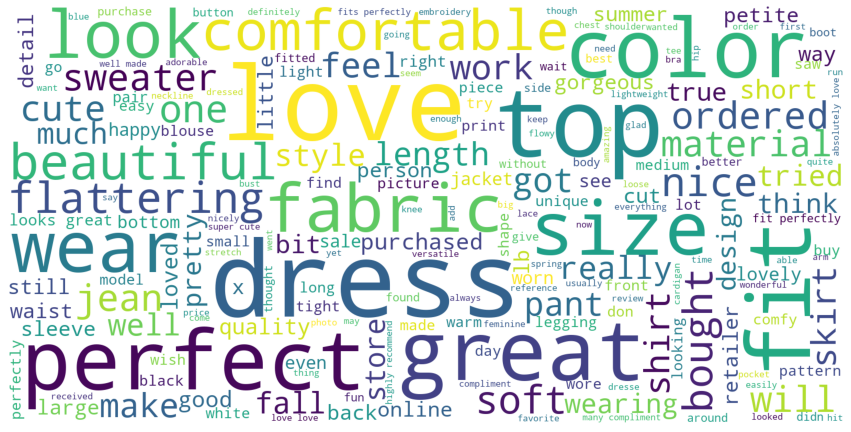

In [112]:
# Generating a WordCloud for Positive Feedback

wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(pos_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

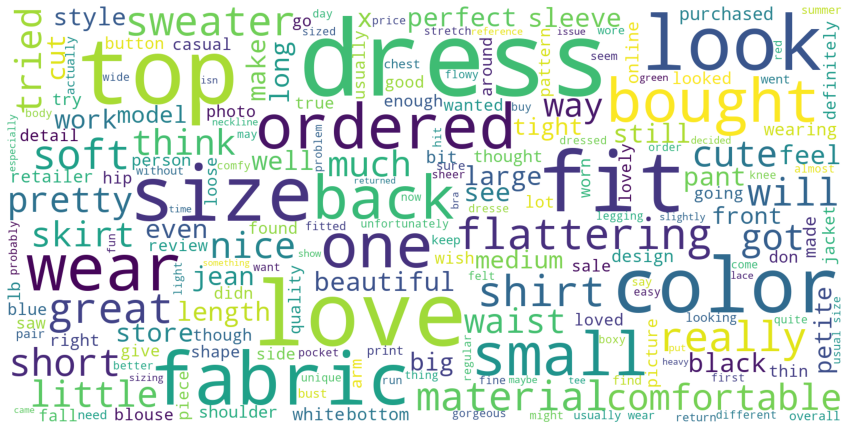

In [114]:
# Generating a WordCloud for Neutral Feedback

wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(neu_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

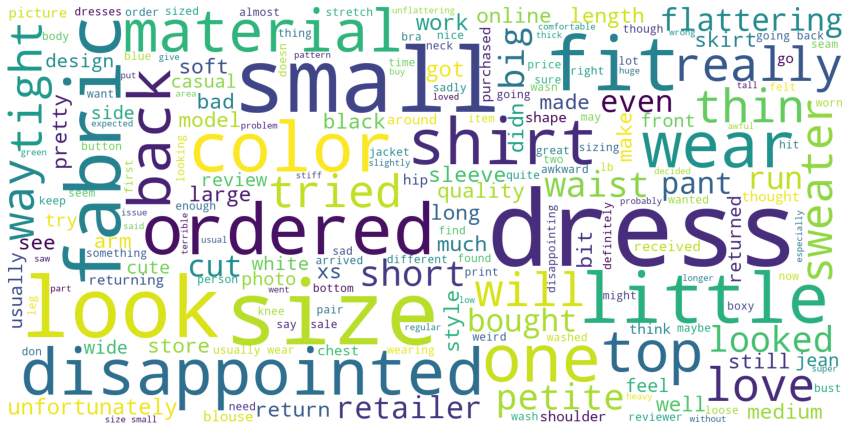

In [115]:
# Generating a WordCloud for Negative Feedback

wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(neg_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

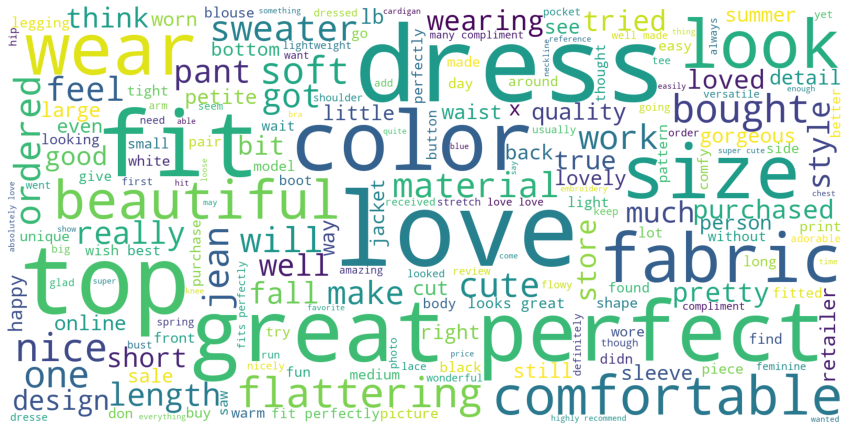

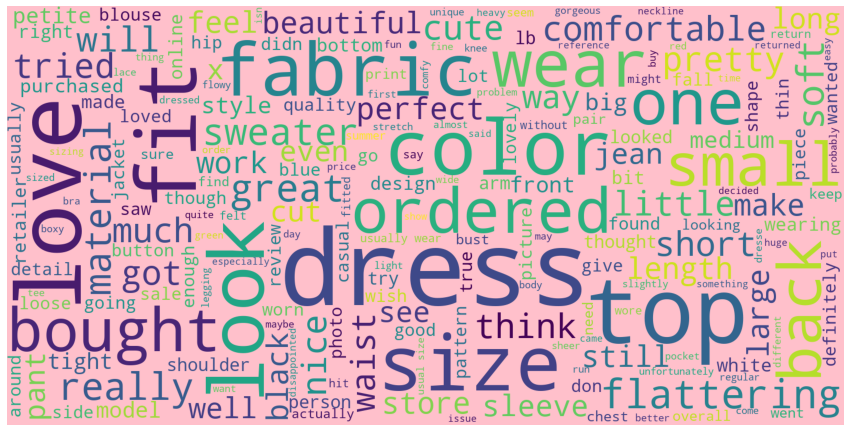

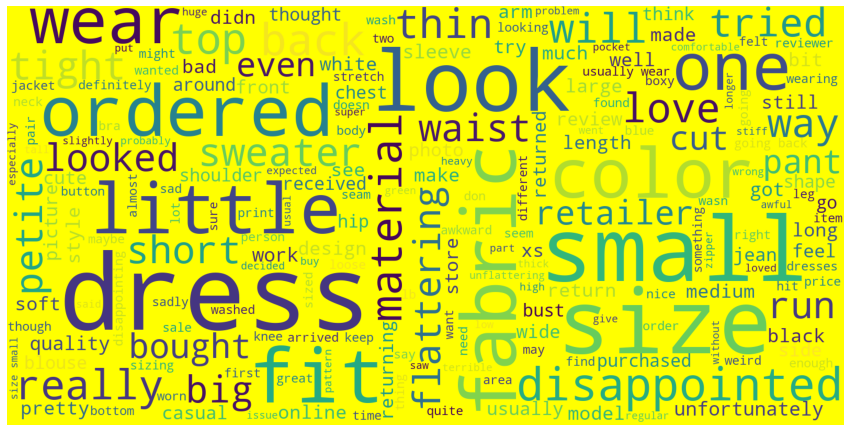

In [116]:
# Now, if we want to add some more words to the STOPWORDS we can append to the list and re-run the plots

from wordcloud import STOPWORDS, ImageColorGenerator
stop_words = ["shirt", "skirt", "united", "SouthwestAir", "AmericanAir", "VirginAmerica","hr", "flight", 
              "due", "now","JetBlue","amp","co"] + list(STOPWORDS)

wordcloud = WordCloud(stopwords = stop_words, width = 1600, height = 800, max_font_size = 200, 
                      background_color = 'white').generate(pos_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")



wordcloud = WordCloud(stopwords = stop_words, width = 1600, height = 800, max_font_size = 200, 
                      background_color = 'pink').generate(neu_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")



wordcloud = WordCloud(stopwords = stop_words, width = 1600, height = 800, max_font_size = 200, 
                      background_color = 'yellow').generate(neg_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")

# Tokenization or Count Vectorization  - This is the time to replace text with some numbers 

# Approach 01 - Tokenization or Count Vectorization 

In [117]:
from sklearn.feature_extraction import text

In [118]:
# Converting the Positive List of Words to Number (like hot encoding)

cv = text.CountVectorizer(input=pos_words)
matrix = cv.fit_transform(pos_words)
pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names())

,aa,aaaahs,aaahed,ab,abbey,abby,ability,abject,able,about,...,zip,zipbutton,zipped,zipper,zippered,zippers,zipping,zips,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8020,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Converting the Neutral List of Words to Number (like hot encoding)

cv = text.CountVectorizer(input=neu_words)
matrix = cv.fit_transform(pos_words)
pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names())

,aa,aaaahs,aaahed,ab,abbey,abby,ability,abject,able,about,...,zip,zipbutton,zipped,zipper,zippered,zippers,zipping,zips,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8020,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Converting the Negative List of Words to Number (like hot encoding)

cv = text.CountVectorizer(input=neg_words)
matrix = cv.fit_transform(pos_words)
pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names())

,aa,aaaahs,aaahed,ab,abbey,abby,ability,abject,able,about,...,zip,zipbutton,zipped,zipper,zippered,zippers,zipping,zips,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8020,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Approach 02 - Tokenization or Count Vectorization with the help of n-grams 

# Create bi-gram 
# ngram_range tuple (min_n, max_n), (1,1)
# (1,1) = Unigram
# (1,2) = Unigram and bigram
# (2,2) = Bigram
# min_n< = n <= max_n

In [121]:
# Count Vectorizer for Positive Words (Bigram)

cv1 = text.CountVectorizer(input = pos_words, ngram_range=(2,2))
matrix1 = cv1.fit_transform(pos_words)
pd.DataFrame(matrix1.toarray(), columns=cv1.get_feature_names())

,aa little,aaaahs galore,aaahed over,ab fab,ab purchased,abbey the,abby and,abby party,abby very,ability to,...,zippers why,zipping and,zipping can,zipping up,zipping was,zips all,zips and,zips to,zips up,zoom in
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Count Vectorizer for Positive Words (TriGram)

# Create tri-gram 
cv2 = text.CountVectorizer(input = pos_words, ngram_range=(3,3))
matrix2 = cv2.fit_transform(pos_words)
pd.DataFrame(matrix2.toarray(), columns=cv2.get_feature_names())

,aa little substance,aaaahs galore with,aaahed over the,ab fab combo,ab purchased size,abbey the velvet,abby and the,abby party be,abby very classy,ability to flatter,...,zippers why can,zipping and it,zipping can wait,zipping up the,zipping was very,zips all the,zips and just,zips to waist,zips up in,zoom in you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# Count Vectorizer for Positive Words (Unigram)

cv3 = text.CountVectorizer(input = pos_words, ngram_range=(1,3))
matrix3 = cv3.fit_transform(pos_words)
pd.DataFrame(matrix3.toarray(), columns=cv3.get_feature_names())

MemoryError: Unable to allocate 18.5 GiB for an array with shape (8023, 310015) and data type int64

# Approach -3 ( TF-IDF, Term Frequency and Inverse Document Freq)

# Which Word is the most important word in each document/Sentence ?
# What makes a word important 
# 1 - IF the word ocuurs a lot in the document 
# 2 - If the word ocurrs rarely in the corpus 

In [124]:
# TFID Vectorizer for Positive Words (Unigram)

tf = text.TfidfVectorizer(input = pos_words, ngram_range=(1,1))
matrix5 = tf.fit_transform(pos_words)
pd.DataFrame(matrix5.toarray(), columns=tf.get_feature_names())

,aa,aaaahs,aaahed,ab,abbey,abby,ability,abject,able,about,...,zip,zipbutton,zipped,zipper,zippered,zippers,zipping,zips,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232819,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# if the size is big it wont be able to generate

# TFID Vectorizer for Positive Words (Bigram)

tf = text.TfidfVectorizer(input = pos_words, ngram_range=(2,2))
matrix5 = tf.fit_transform(pos_words)
pd.DataFrame(matrix5.toarray(), columns=tf.get_feature_names())

,aa little,aaaahs galore,aaahed over,ab fab,ab purchased,abbey the,abby and,abby party,abby very,ability to,...,zippers why,zipping and,zipping can,zipping up,zipping was,zips all,zips and,zips to,zips up,zoom in
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cosine Similarity ( Correlation of textual Features) - Similarity of Text Documents 

In [126]:
# Cosine Similarity for Positive Words (Unigram)

tf1 = text.TfidfVectorizer(input = pos_words, ngram_range=(1,2))
matrix7 = tf1.fit_transform(pos_words)
#pd.DataFrame(matrix7.toarray(), columns=tf1.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(matrix7)

array([[1.        , 0.00440483, 0.00363989, ..., 0.00284403, 0.00733962,
        0.00815459],
       [0.00440483, 1.        , 0.02346314, ..., 0.12439425, 0.03614442,
        0.01501197],
       [0.00363989, 0.02346314, 1.        , ..., 0.0144589 , 0.0213141 ,
        0.00938585],
       ...,
       [0.00284403, 0.12439425, 0.0144589 , ..., 1.        , 0.0442172 ,
        0.00840406],
       [0.00733962, 0.03614442, 0.0213141 , ..., 0.0442172 , 1.        ,
        0.03887828],
       [0.00815459, 0.01501197, 0.00938585, ..., 0.00840406, 0.03887828,
        1.        ]])

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [128]:
tfidfconvertor = TfidfVectorizer(max_features=5000, min_df = 5, max_df = .7, stop_words= stopwords.words('english'))

# min_df = word should be present in atleast 5 documents 
# max_df = word must not occur in more than 70 percent of document ?
tf1 = text.TfidfVectorizer(input = pos_words, ngram_range=(1,1))
matrix6 = tf1.fit_transform(pos_words)
pd.DataFrame(matrix6.toarray(), columns=tf1.get_feature_names())


,aa,aaaahs,aaahed,ab,abbey,abby,ability,abject,able,about,...,zip,zipbutton,zipped,zipper,zippered,zippers,zipping,zips,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232819,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
X = tfidfconvertor.fit_transform(pos_words).toarray()

In [118]:
X = tfidfconvertor.fit_transform(pos_words)

In [119]:
pos_words

['absolutely wonderful silky and sexy and comfortable',
 'love this dress it sooo pretty i happened to find it in a store and i glad i did bc i never would have ordered it online bc it petite i bought a petite and am i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite',
 'i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments',
 'this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt',
 'i love the look and feel of this tulle dress i was looking for something different but not over the top for new year eve i small chested and the top of this dress is form fitting for a flattering look once i steamed the tulle it was perfect i ordered an xsp length was perfect too',
 'beautifully made pants and on trend with the flared crop so mu

In [8]:
pip install textblob

In [10]:
from textblob import TextBlob